#Introdução

Este é um projeto de Ciência de Dados que tem o intuito de elaborar modelos de regressão linear para prever preços de casas em Melbourne, Austrália.

Trata-se de um projetos para estudo e composição de portfólio.

Foi realizada uma análise exploratória dos dados, com o intuito de descrever algumas relações e demonstrar alguns insights que podem ser estratégicos na tomada de decisões.

Adiante, os dados foram pré-processados, ocorrendo a remoção de valores missing e outliers. Também foi realizada a conversão de variáveis categóricas emnuméricas.

Na sequência, foram criados três modelos baselines: Regressão Linear, Árvore de Decisão e Floresta Aleatória. Nenhum hiperparâmetro foi modificado, adotando-se assim os valores default dos métodos.

Finalmente, foi realizada a validação cruzada apra cada modelo, e os valores de resultados são exibidos atravésde um quadro resumo.

Observa-se que o modelo de Floresta Aleatória, por se tratar de um modelo ensemble e mais complexo, obteve melhores resultados.

###Dicionário dos dados:

Rooms: Representa o número de quartos no imóvel.

Price: Refere-se ao preço de venda do imóvel em dólares australianos.

Method: Indica o método de venda do imóvel (por exemplo, S - venda, SP - venda prévia, PI - venda particular, etc.).

Type: Representa o tipo de propriedade (por exemplo, h - casa, u - unidade/apartamento, t - casa geminada ou semi-separada).

SellerG: Refere-se ao nome do agente imobiliário responsável pela venda do imóvel.

Date: Indica a data da venda do imóvel.

Distance: Representa a distância em quilômetros do imóvel ao centro da cidade de Melbourne.

Postcode: Refere-se ao código postal da área em que o imóvel está localizado.

Bedroom2: Indica o número de quartos além do quarto principal.

Bathroom: Representa o número de banheiros no imóvel.

Car: Representa o número de vagas de estacionamento disponíveis para veículos no imóvel.

Landsize: Refere-se ao tamanho do terreno em metros quadrados.

BuildingArea: Indica a área construída do imóvel em metros quadrados.

YearBuilt: Representa o ano em que o imóvel foi construído.

CouncilArea: Refere-se à área do conselho local em que o imóvel está localizado.

Lattitude: Indica a latitude geográfica do imóvel.

Longtitude: Representa a longitude geográfica do imóvel.

Regionname: Refere-se ao nome da região geográfica em que o imóvel está localizado.

Propertycount: Indica a contagem de propriedades na área suburbana em que o imóvel está localizado.

#Análise exploratória

In [204]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [205]:
# Impotando o dataset:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Melbourn Housing/melb_data.csv',parse_dates=['Date'])

<ipython-input-205-279f08ed9cf2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Melbourn Housing/melb_data.csv',parse_dates=['Date'])


In [206]:
# Criando cópia do dataset
df=data.copy()

In [207]:
# Visualizando linhas aleatórias do dataset
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3504,Keilor East,23 Viewbank Dr,4,h,732000.0,S,Nelson,2016-08-28,12.8,3033.0,...,2.0,2.0,544.0,233.0,1980.0,Moonee Valley,-37.74790,144.87630,Western Metropolitan,5629.0
7153,Murrumbeena,226 Murrumbeena Rd,3,h,1076000.0,S,Woodards,2016-07-26,12.1,3163.0,...,1.0,1.0,554.0,NaN,NaN,Glen Eira,-37.90120,145.06460,Southern Metropolitan,4442.0
8660,Oakleigh South,8 Lido Ct,3,h,770000.0,S,C21,2017-08-04,14.7,3167.0,...,1.0,1.0,590.0,132.0,1960.0,Kingston,-37.91800,145.08500,South-Eastern Metropolitan,3692.0
12913,Briar Hill,4/129 Mountain View Rd,2,t,625000.0,S,Barry,2017-08-19,16.1,3088.0,...,2.0,1.0,189.0,NaN,NaN,NaN,-37.70835,145.11795,Eastern Metropolitan,1390.0
1217,Brighton East,38 Agnew St,3,h,1710000.0,S,hockingstuart,2016-09-17,10.7,3187.0,...,3.0,2.0,435.0,228.0,1915.0,Bayside,-37.91000,145.01130,Southern Metropolitan,6938.0
412,Ashwood,18 Montrose St,2,h,1075000.0,VB,Jellis,2016-04-06,12.2,3147.0,...,1.0,2.0,695.0,114.0,1950.0,Monash,-37.86940,145.09440,Southern Metropolitan,2894.0
2372,Essendon,8 Monica St,6,h,2620000.0,S,Brad,2016-10-12,8.0,3040.0,...,4.0,2.0,860.0,355.0,1930.0,Moonee Valley,-37.74840,144.90250,Western Metropolitan,9264.0
13085,Wyndham Vale,11 Chisholm Pl,3,h,475000.0,S,hockingstuart,2017-08-19,27.2,3024.0,...,2.0,1.0,300.0,179.0,NaN,NaN,-37.88162,144.62082,Western Metropolitan,5262.0
3758,Maidstone,191 Ballarat Rd,3,h,750000.0,VB,C21,2016-04-23,9.2,3012.0,...,2.0,1.0,782.0,NaN,NaN,Maribyrnong,-37.78290,144.86840,Western Metropolitan,3873.0
1733,Carnegie,2/22 Kokaribb Rd,2,u,465000.0,S,Ray,2017-11-02,11.4,3163.0,...,1.0,1.0,0.0,56.0,1970.0,Glen Eira,-37.88810,145.05580,Southern Metropolitan,7822.0


In [208]:
# Visualizando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [209]:
# Visualizando valores únicos
df.nunique().sort_values(ascending=False)

Address          13378
Longtitude        7063
Lattitude         6503
Price             2204
Landsize          1448
BuildingArea       602
Suburb             314
Propertycount      311
SellerG            268
Distance           202
Postcode           198
YearBuilt          144
Date                58
CouncilArea         33
Bedroom2            12
Car                 11
Bathroom             9
Rooms                9
Regionname           8
Method               5
Type                 3
dtype: int64

In [210]:
# Valores faltantes
df.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

Text(0.5, 1.0, 'Percentual de valores faltantes por variável')

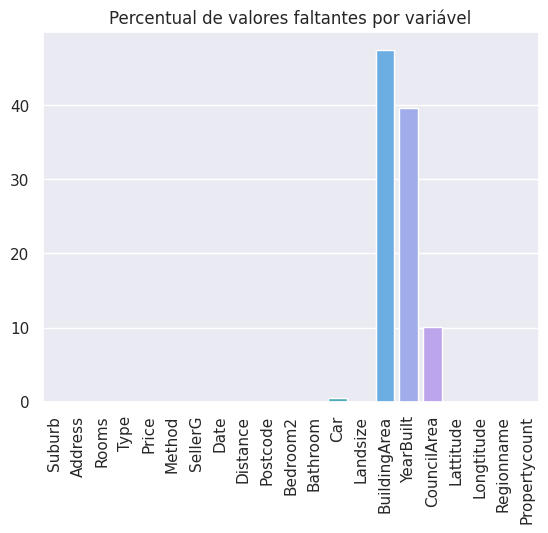

In [211]:
# Exibido gráfico de valores faltantes
ax=sns.barplot(x=df.columns,y=100*df.isnull().sum()/len(list(df.index)))
plt.xticks(rotation=90)
ax.set_title('Percentual de valores faltantes por variável')

# Nota: as variáveis 'BuildinArea', 'YearBuilt' e 'CouncilArea'não serão utilizadas devido ao alto percentual de valores faltantes.
# Os valores faltantes da variável 'Car' serão tratados posteriormente.

In [212]:
# Sumarização
df.describe()

# Nota: as variáveis 'Badroom2', 'Bathroom', 'Landsize' e 'BuildingArea' possuem valores iguais a zero, 
# o que, provavelmente, são valores com erro.
# Para as variáveis 'Distance' e 'Car', faz sentido haver valores Zero

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [213]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
13580 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 106.2 KB


In [214]:
# Verificando os valores Zero nas variáveis 'Bedroom2', 'Bathroom' e 'Landsize'
qtd1=df.loc[df['Bedroom2']==0,'Bedroom2'].count()
qtd2=df.loc[df['Bathroom']==0,'Bathroom'].count()
qtd3=df.loc[df['Landsize']==0,'Landsize'].count()

qtd_tot1=len(list(df['Bedroom2'].dropna()))
qtd_tot2=len(list(df['Bathroom'].dropna()))
qtd_tot3=len(list(df['Landsize'].dropna()))

print(f'\n{100*(qtd1/qtd_tot1):.2f}% dos valores de "Bedroom2" são iguais a Zero')
print(f'\n{100*(qtd2/qtd_tot2):.2f}% dos valores de "Bathroom" são iguais a Zero')
print(f'\n{100*(qtd3/qtd_tot3):.2f}% dos valores de "Landsize" são iguais a Zero')

# NOTAS: 
# A variável 'Bedroom2', futuramente, será excluída por conta de sua alta correlação com a variável 'Rooms'
# # Para a variável 'Landsize', um estudo adicional será realizado, pois há indícios que os valores zerados se tratam de instâncias do tipo apartamento (unity).
# Ou seja, o usuário se abstém de responder a essa informação, por desconhecimento ou por não fazer sentido em se inserir a área de um lote quando
# se tata de uma unidade do tipo de apartamento
# BuildingArea também possui valores iguais a zero, porém, esta variável já seria excluída por conta de seus inúmeros valores faltantes


0.12% dos valores de "Bedroom2" são iguais a Zero

0.25% dos valores de "Bathroom" são iguais a Zero

14.28% dos valores de "Landsize" são iguais a Zero


In [215]:
df.loc[df['Landsize']==0,['Type','Landsize']].groupby('Type').size().sort_values(ascending=False)

#Observa-se que a maioria dos valores zerados para a variável 'LandingSize' é referente a apartamentos, confirmado a hipótes anterior.
# Como não há nenhuma outra informação ao qual pode-se fazer uma relação de área da unidade, esta variáel será excluída.

Type
u    1629
h     171
t     139
dtype: int64

In [216]:
# Correlação com a variável preço
df.corr()['Price'].sort_values(ascending=False)

<ipython-input-216-693a5d6e192a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

Text(0.5, 1.0, 'Percentual de outliers por variável')

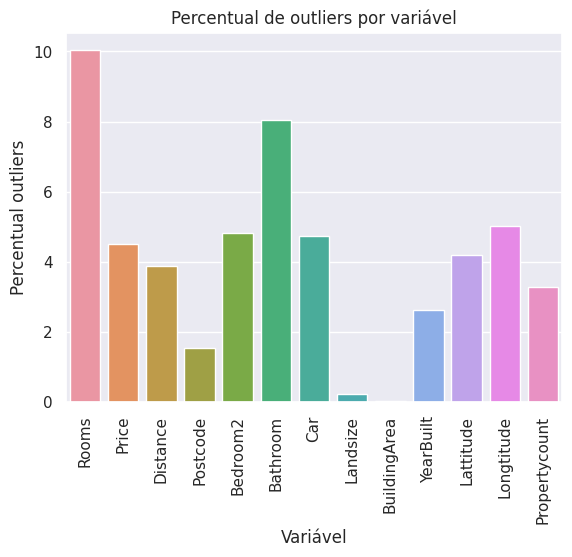

In [217]:
# Quantidade de outliers por variável numérica:

sns.set_style('darkgrid')

#Total de instâncias
tot_inst=df.shape[0]

#Definindo listas vazias para contabilizar os outliers
qtd_out_inf=[]
qtd_out_sup=[]

#Lista vazia para armazenar o nome da variável
nome_col=[]

for col in df.columns:

  if df[col].dtypes == 'float64' or df[col].dtypes == 'int':  #fitrando somente colunas numéricas
    # Limite superior = mediana + 2x Desvio Padrão
    ls=np.mean(df[col])+2*np.std(df[col])

    # Limite inferior = mediana - 2x Desvio Padrão
    li=np.mean(df[col])-2*np.std(df[col])

    # contando os valores fora dos limites (outliers)
    qtd_out_sup.append(df.loc[df[col]>ls,col].count())
    qtd_out_inf.append(df.loc[df[col]<li,col].count())

    # Armazenando o nome da variável
    nome_col.append(col)

# Definindo um dataset resumo:
qd_out=pd.DataFrame()
qd_out['Variável']=nome_col
qd_out['Outliers inf']=qtd_out_inf
qd_out['Outliers sup']=qtd_out_sup
qd_out['Outliers totais']=qd_out['Outliers inf']+qd_out['Outliers sup']
qd_out['Percentual outliers']=100*qd_out['Outliers totais']/tot_inst

# Exibindo o dataframe
# qd_out.sort_values(by=['Outliers totais'],ascending=False)

# Exibido gráfico
ax=sns.barplot(x=qd_out['Variável'],y=qd_out['Percentual outliers'])
plt.xticks(rotation=90)
ax.set_title('Percentual de outliers por variável')


Existem 611 valores acima do limite superior, o que correponde a 4.50 % dos dados da variável
Existem 0 valores abaixo do limite inferior, o que correponde a 0.00 % dos dados da variável
No total, existem 611 outliers, que representam 4.50 % dos dados da variável




<Axes: >

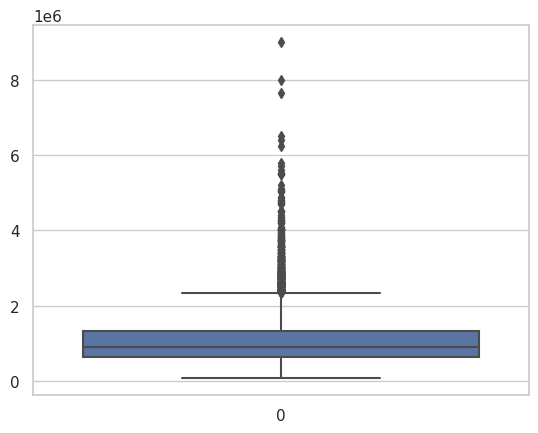

In [218]:
# Outliers da variável target (Price)
# Econtrando os limites superior e inferior
col='Price'
tot=df[col].count()

# Limite superior = mediana + 2x Desvio Padrão
ls=np.mean(df[col])+2*np.std(df[col])

# Limite inferior = mediana - 2x Desvio Padrão
li=np.mean(df[col])-2*np.std(df[col])

# Listando os valores fora dos limites (outliers)
out_sup=df.loc[df[col]>ls,col]
out_inf=df.loc[df[col]<li,col]

print(f'\nExistem {out_sup.count()} valores acima do limite superior, o que correponde a {100*out_sup.count()/tot:.2f} % dos dados da variável')
print(f'Existem {out_inf.count()} valores abaixo do limite inferior, o que correponde a {100*out_inf.count()/tot:.2f} % dos dados da variável')
print(f'No total, existem {out_sup.count()+out_inf.count()} outliers, que representam {100*(out_sup.count()+out_inf.count())/tot:.2f} % dos dados da variável\n\n')

# Visualizando os outliers das variáveis
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df[col])

#Somente 4,5% dos valores da variável preço são considerados outliers.
#Entende-se que os valores não são originados por erros de digitação ou medidas errôneas.
#Portanto, os outliers dessa ariável não serão excluídos

# Para o restante das variáveis os outliers também não serão excluídos.

Text(0.5, 1.0, 'Distribuição da variável "Price"')

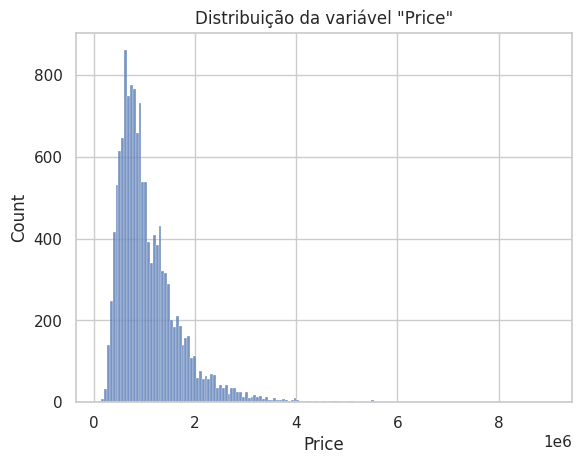

In [219]:
# Distribuição do preço
ax=sns.histplot(df['Price'])
ax.set_title('Distribuição da variável "Price"')

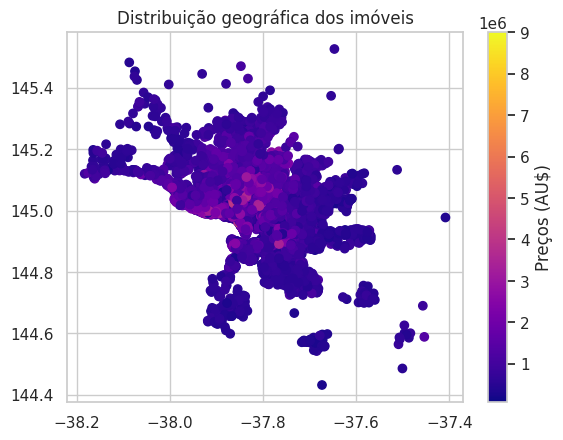

In [220]:
# Visualizando a distribuição geográfica dos imóveis
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0, vmax=df['Price'].max())
# norm = mcolors.Normalize(vmin=df['Price'].min(), vmax=df['Price'].max())
plt.scatter(x=df['Lattitude'],y=df['Longtitude'],c=df['Price'],cmap='plasma',alpha=1)

plt.title('Distribuição geográfica dos imóveis')
# colorbar = plt.colorbar()
colorbar =plt.colorbar()
colorbar.set_label('Preços (AU$)')

# Nota: percebe-se a existência de maiores preços na região central

In [221]:
# Verificando quais subúrbios possuem mais valores faltantes para a área construída

sub=df[['Suburb','BuildingArea']]

sub1=sub.copy()

# Total de ocorrências de cada subúrbio
tot_sub=list(sub1.groupby('Suburb').size())

# Quantidade de valores faltantes por subúrbio
sub2 = sub1.groupby('Suburb')['BuildingArea'].apply(lambda x: x.isnull().sum())
tot_nan=list(sub2)

#Criando um dataset para visualização
qd=pd.DataFrame()
qd['Suburb']=sub['Suburb'].drop_duplicates()
qd['Qtd imóveis']=tot_sub
qd['Qtd imóveis sem área']=tot_nan
qd['% NaN']=100*qd['Qtd imóveis sem área']/qd['Qtd imóveis']

qd.sort_values(by=['% NaN'],ascending=False)


# Existem subúrbios onde a maioria ou todas das casas não possuem informações de área construída,
# o que poderia ser uma variável promissora.
# Uma sugestão de trabalhos futuros seria investigar o motivo dessa ausência de informação

,Suburb,Qtd imóveis,Qtd imóveis sem área,% NaN
9614,Langwarrin,2,2,100.0
969,Box Hill,4,4,100.0
9038,Blackburn North,1,1,100.0
5746,Spotswood,1,1,100.0
2968,Hadfield,1,1,100.0
...,...,...,...,...
7322,Oakleigh,4,0,0.0
8957,Sunbury,2,0,0.0
8939,Seaford,1,0,0.0
6854,East Melbourne,1,0,0.0


In [222]:
# Top 10 Preço médio por m² de terreno, por região
df_top=df.loc[df['Landsize']>0,['Suburb','Price','Landsize']]
#Observação: alguns valores de landsize estão como Zero

df_top['AU$/m²'] = df_top['Price']/df_top['Landsize']
df_top[['Suburb','AU$/m²']].groupby('Suburb').mean().sort_values(by=['AU$/m²'],ascending=False).head(10)

,AU$/m²
Suburb,
Toorak,13962.976006
Albert Park,11265.487673
Heidelberg West,10936.445382
Middle Park,10798.917048
South Melbourne,10030.846086
East Melbourne,9528.402776
Carlton,8612.341479
West Melbourne,8571.265172
Prahran,8375.295851


Text(0, 0.5, 'Contagem')

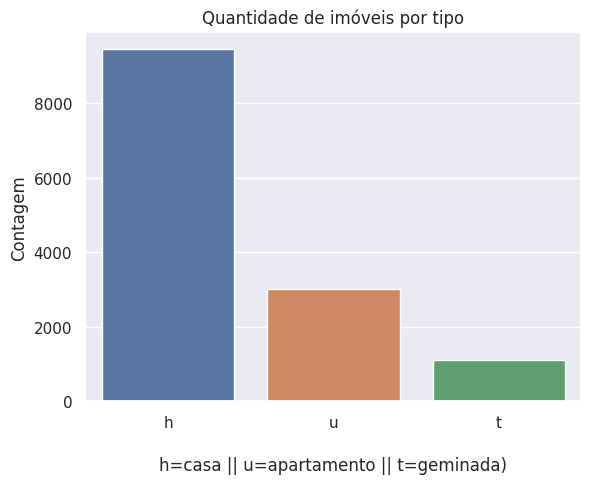

In [223]:
# Verificando a distribuição do tipo de imóvel

sns.set_style('darkgrid')
df_tipo=df[['Suburb','Type']]
ax=sns.countplot(df_tipo,x=df_tipo['Type'])
ax.set_title('Quantidade de imóveis por tipo')
ax.set_xlabel('\nh=casa || u=apartamento || t=geminada)')
ax.set_ylabel('Contagem')


<ipython-input-224-b09efcb21ed7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tipo2['Type']=df_tipo2['Type'].replace(['h','u','t'],['casa','apto','geminada'],regex=True)


Text(0.5, 0, 'Langtitude')

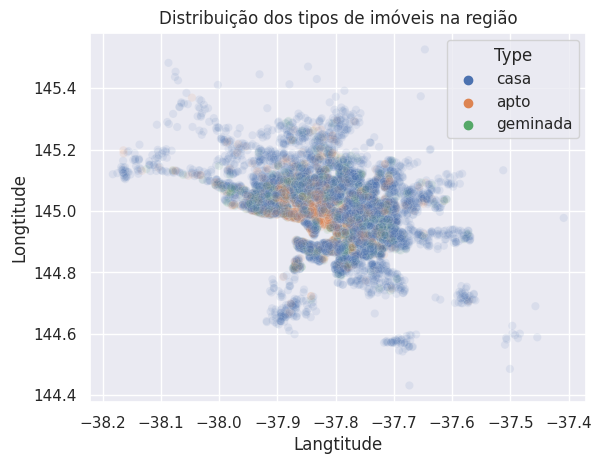

In [224]:
# Verificando a distribuição dos tipos de imóveis em relação às coordenadas geográficas
df_tipo2=df[['Suburb','Type','Lattitude','Longtitude']]
df_tipo2['Type']=df_tipo2['Type'].replace(['h','u','t'],['casa','apto','geminada'],regex=True)

ax=sns.scatterplot(x=df_tipo2['Lattitude'],y=df_tipo2['Longtitude'],hue=df_tipo2['Type'],alpha=0.1)

ax.set_title('Distribuição dos tipos de imóveis na região')
ax.set_xlabel('Latitude')
ax.set_xlabel('Langtitude')


# Nota: percebe-se a maior concentração de imóveis do tipo apartamento na região central

#Máquina preditiva

In [225]:
# Importando as bibliotecas

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_score

# Nota: o cross_validate, diferente do cross_val_score, permite avaliar múltiplas pontuações

In [226]:
# Preparação dos dados

#Criando um dataframe, eliminando variáveis que não serão utilizadas
df_prep=data[['Rooms','Type','Price','Bathroom','Car','Lattitude','Longtitude']]
# df_prep.info()
df_prep.describe()

# Variáveis não utilizadas:
# Suburb, RegionName, Address, Postcode, Date, SellerG, Method, Propertycount --> sem relevância
# BuildinArea, YearBuilt, ConcilArea --> muitos valores faltantes
# Bedroom2 --> alta correlação com 'Rooms'
# Distance --> entende-se que 'Lattitude' e 'Longtitude' já são suficientes
# LandingSize --> muitos valores zerados

,Rooms,Price,Bathroom,Car,Lattitude,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13518.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,1.534242,1.610075,-37.809203,144.995216
std,0.955748,6.393107e+05,0.691712,0.962634,0.079260,0.103916
min,1.000000,8.500000e+04,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,1.000000,1.000000,-37.856822,144.929600
50%,3.000000,9.030000e+05,1.000000,2.000000,-37.802355,145.000100
75%,3.000000,1.330000e+06,2.000000,2.000000,-37.756400,145.058305
max,10.000000,9.000000e+06,8.000000,10.000000,-37.408530,145.526350


In [227]:
# Fazendo a trasformação da variável categórica "type"

le=LabelEncoder()

# Treinando o encoder nas variáveis 'type'
df_prep['Type']=le.fit_transform(df['Type'])   #criando nova coluna para manter ambas as variáveis (categórica e numérica)

<ipython-input-227-e983d1c577ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['Type']=le.fit_transform(df['Type'])   #criando nova coluna para manter ambas as variáveis (categórica e numérica)


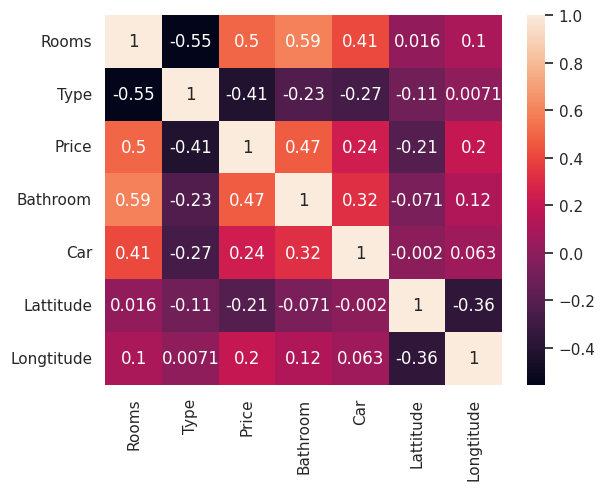

In [228]:
# Verificando a correlação entre as variáveis
ax=sns.heatmap(df_prep.corr(),annot=True)

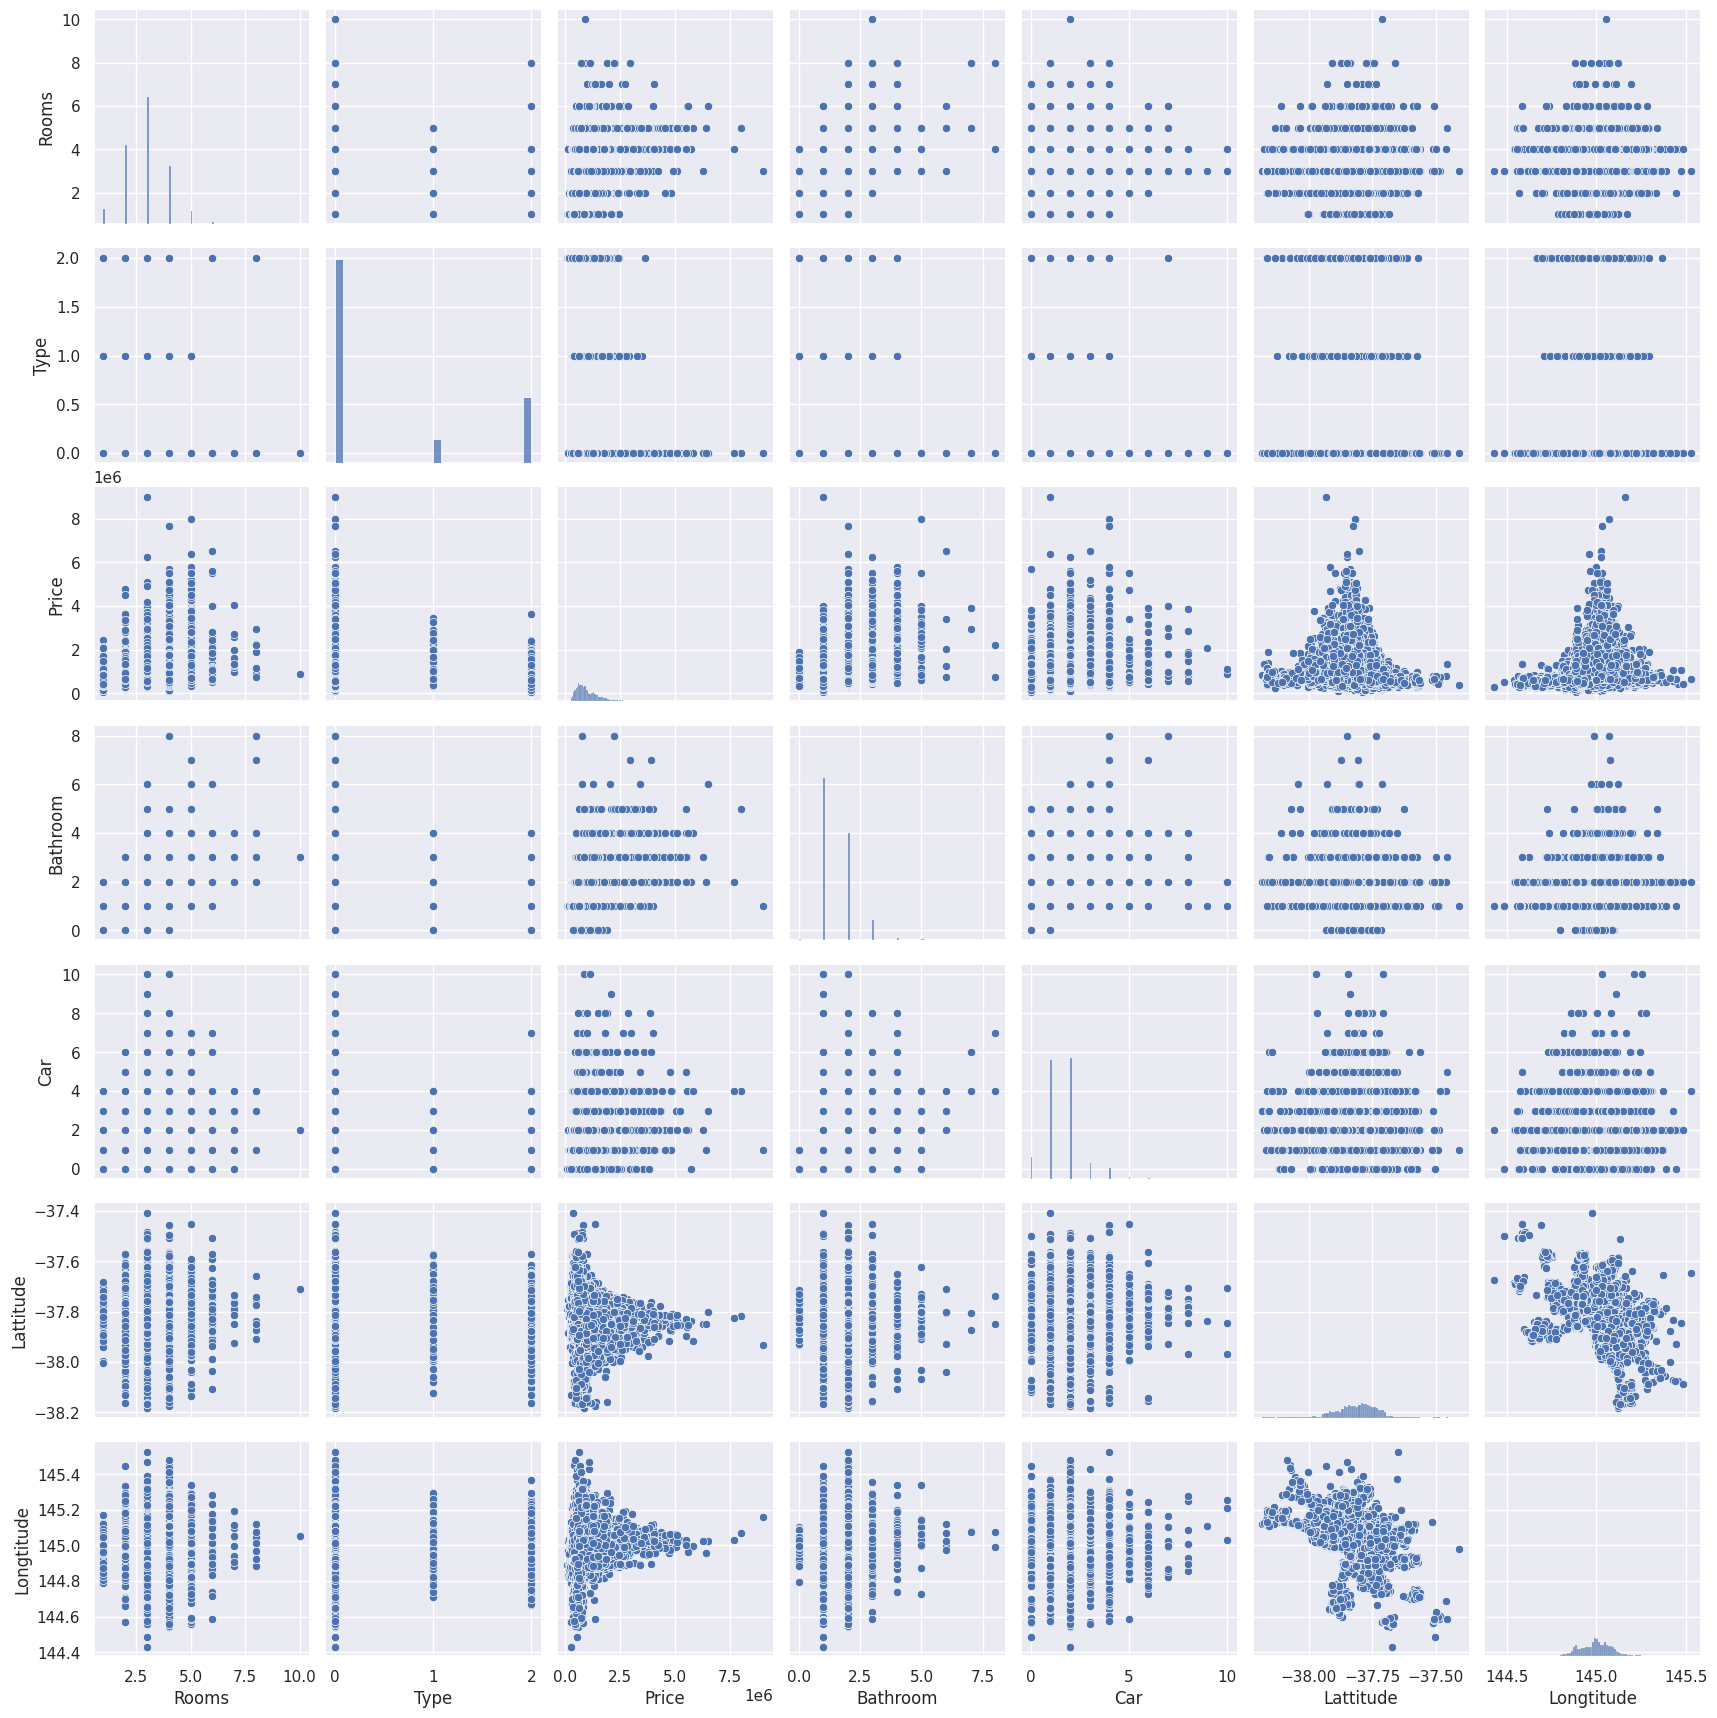

In [229]:
# Visualizando a distribuição e a correlação entre as variáveis dos dados preparados
sns.pairplot(df_prep)

In [230]:
# # Eliminando os outliers da variávies

# #Basta passar uma lista com as variáveis ao que se deseja realizar a exclusão de outliers
# col=['Price','Rooms', 'Price', 'Bathroom','Car']
# ls=[]
# li=[]

# # Econtrando os limites superior e inferior
# for i in range(len(col)):
#   # Limite superior = mediana + 2x Desvio Padrão
#   ls.append(np.mean(df_prep[col[i]])+2*np.std(df_prep[col[i]]))

#   # Limite inferior = mediana - 2x Desvio Padrão
#   li.append(np.mean(df_prep[col[i]])-2*np.std(df_prep[col[i]]))

In [231]:
# # Dropando os valores fora dos limites (outliers)
# # Nota:o script para dropar não pode estar no mesmo bloco
# # que os scripts que calculam ls e ls, senão, a cada vez
# # que o código for executado, ls e li serão recalculados e novos
# # valores serão dropados.

# for i in range(len(col)):
#   df_prep=df_prep.drop(df_prep[df_prep[col[i]]>ls[i]].index)
#   df_prep=df_prep.drop(df_prep[df_prep[col[i]]<li[i]].index)

# df_prep.info()
# print('\n'+'='*50+'\n')
# df_prep.describe()

In [232]:
# Dropando valores iguais a Zero na variável "Bathroom"
df_prep=df_prep.drop(df_prep[df_prep['Bathroom']==0].index)

In [233]:
# Imputando valores faltantes na variável 'carro'
# Será armazenado o valor igual a 0 (0 vagas de carro)
df_prep['Car'].fillna(0,inplace=True)

In [234]:
# Dataframe final para o modelo
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13546 entries, 0 to 13579
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       13546 non-null  int64  
 1   Type        13546 non-null  int64  
 2   Price       13546 non-null  float64
 3   Bathroom    13546 non-null  float64
 4   Car         13546 non-null  float64
 5   Lattitude   13546 non-null  float64
 6   Longtitude  13546 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 846.6 KB


In [235]:
# Criando dados de treino e de teste
X=df_prep.drop('Price',axis=1)
y=df_prep['Price']

X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.3,random_state=1)

In [236]:
# Criando, treinando e realizando as predições com os modelos baseline

# Listas auxiliares
metric = {'rmse (AU$)': [], 'r2 (%)': [],'model':[]}


#====================== Regressão linear ==========================

# Regressão linear
lr=LinearRegression()
lr.fit(X_treino,y_treino)
y_pred_lr=lr.predict(X_teste)

#Métricas regressão linear
mse=mean_squared_error(y_teste,y_pred_lr)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_lr)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('lr')

#====================== Árvore de decisão ==========================

#Árvore de decisão
dt=DecisionTreeRegressor()
dt.fit(X_treino,y_treino)
y_pred_dt=dt.predict(X_teste)

#Métricas Árvore de Decisão
mse=mean_squared_error(y_teste,y_pred_dt)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_dt)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('dt')


#====================== Floresta aleatória ==========================

# Floresta aleatória
rf=RandomForestRegressor()
rf.fit(X_treino,y_treino)
y_pred_rf=rf.predict(X_teste)

#Métricas Árvores Aleatória
mse=mean_squared_error(y_teste,y_pred_rf)
rmse=np.sqrt(mse)
r2=r2_score(y_teste,y_pred_rf)*100
metric['rmse (AU$)'].append(rmse)
metric['r2 (%)'].append(r2)
metric['model'].append('rf')

#====================================================================


# Criando dataframe resumo
qd_metric=round(pd.DataFrame(metric),2)
qd_metric.set_index('model')

,rmse (AU$),r2 (%)
model,,
lr,505728.07,38.00
dt,428321.76,55.53
rf,344186.05,71.28


In [237]:
# Realizando validação cruzada no modelo mais promissor - Random Forest:
# Quantidade de folds: 5

#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino, y_treino, cv=5,scoring=scoring)

# Extraindo os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,73.21,330216.24


In [238]:
# Normalizando os dados de preço do dataset

normal_scaler=MinMaxScaler()

X_treino_norm = normal_scaler.fit_transform(X_treino)


#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino_norm, y_treino, cv=5,scoring=scoring)

# Extrair os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,73.15,330591.88


In [239]:
# Padronizando os dados de preço do dataset

std_scaler=MinMaxScaler()

X_treino_pad = std_scaler.fit_transform(X_treino)

#Definido as métricas
scoring = {'r2': make_scorer(r2_score), 'rmse': make_scorer(mean_squared_error, squared=False)}

#Rodando o modelo (obs: results será um dicionário!)
results_rf = cross_validate(rf, X_treino_pad, y_treino, cv=5,scoring=scoring)

# Extrair os resultados médios das métricas do modelo
r2_scores_rf = round(100*results_rf['test_r2'].mean(),2)
rmse_scores_rf = round(results_rf['test_rmse'].mean(),2)


#Criando um dataframe resumo
qd_cross=pd.DataFrame()
qd_cross['model']=['rf']
qd_cross['r2 médio (%)']=[r2_scores_rf]
qd_cross['rmse médio (AU$)']=[rmse_scores_rf]

qd_cross

,model,r2 médio (%),rmse médio (AU$)
0,rf,73.16,330577.53


In [240]:
# Verificando o modelo em dados nunca vistos

y_inedito=rf.predict(X_teste)

r2_inedito=r2_score(y_inedito,y_teste)*100
rmse_inedito=mean_squared_error(y_inedito,y_teste)
rmse_inedito=np.sqrt(rmse_inedito)

print(f'\nR² final: {r2_inedito:.2f}%\n')
print(f'RMSE final: AU$ {rmse_inedito:.2f}\n')



R² final: 63.92%

RMSE final: AU$ 344186.05



In [241]:
# Criando predições para dados novos quaisquer:
new_rooms= 2
new_type= 1     # 0=h(casa) || 1=u(unidade/apartamento) || 2=t(casa geminada ou semi-separada).  
new_bathroom= 2
new_car= 1
new_latt= -119.806806
new_long= 85.055900

new_predict=np.array([new_rooms,new_type,new_bathroom,new_car,new_latt,new_long])
new_predict = new_predict.reshape(1, -1)  # Transforma o array em uma matriz bidimensional

val=rf.predict(new_predict)
val=float(val)

print('='*50)
print(f'\nO valor estimado do imóvel é de AU$ {val:.2f}\n')
print('='*50)


O valor estimado do imóvel é de AU$ 519500.00



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [242]:
df_prep.groupby('Type').size()

Type
0    9434
1    1112
2    3000
dtype: int64